In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [3]:
df_market_data.dtypes

coin_id                          object
price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Select only the numeric columns
numeric_columns = df_market_data.select_dtypes(include=['float64', 'int64'])

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the data
normal_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the scaled data
normal_df = pd.DataFrame(normal_data, columns=numeric_columns.columns)

# Set the index
normal_df.index = df_market_data.index

# Display sample data
print(normal_df.head(5))


   price_change_percentage_24h  price_change_percentage_7d  \
0                     0.508529                    0.493193   
1                     0.185446                    0.934445   
2                     0.021774                   -0.706337   
3                    -0.040764                   -0.810928   
4                     1.193036                    2.000959   

   price_change_percentage_14d  price_change_percentage_30d  \
0                     0.772200                     0.235460   
1                     0.558692                    -0.054341   
2                    -0.021680                    -0.061030   
3                     0.249458                    -0.050388   
4                     1.760610                     0.545842   

   price_change_percentage_60d  price_change_percentage_200d  \
0                    -0.067495                     -0.355953   
1                    -0.273483                     -0.115759   
2                     0.008005                     -0.55

In [7]:
# Create a DataFrame with the scaled data
normal_df = pd.DataFrame(normal_data, index=df_market_data.index, columns=df_market_data.columns[:-1])

# Add the 'coin_id' column to the DataFrame
normal_df['coin_id'] = df_market_data['coin_id']

# Set the 'coin_id' column as the index for normal_df
normal_df.set_index('coin_id', inplace=True)

# Display sample data
print(normal_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.493193                    0.772200   
ethereum                         0.934445                    0.558692   
tether                          -0.706337                   -0.021680   
ripple                          -0.810928                    0.249458   
bitcoin-cash                     2.000959                    1.760610   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.235460                    -0.067495   
ethereum                        -0.054341                    -0.273483   
tether                          -0.061030                     0.008005   
ripple                          -0.050388                    -0.373164   
bitcoin-cash                     0.545842   

---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
# Select only numeric columns from the DataFrame
numeric_columns = df_market_data.select_dtypes(include=['number'])

# create a list with the number of k values from 1 to 11 
k_values = range(1, 12)  

# Create an empty list to store the inertia values
inertia_values = []

# create for loop to compute the inertia with each possible value of k 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit KMeans to the original data (numeric columns only)
    kmeans.fit(numeric_columns)
    
    # Append the inertia (sum of squared distances to the nearest centroid) to the list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values for each k-value
for k, inertia in zip(k_values, inertia_values):
    print(f"Number of clusters (k): {k}, Inertia: {inertia}")



C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Number of clusters (k): 1, Inertia: 69983541.80285285
Number of clusters (k): 2, Inertia: 8193203.593539453
Number of clusters (k): 3, Inertia: 2592706.8825531797
Number of clusters (k): 4, Inertia: 835227.4380640759
Number of clusters (k): 5, Inertia: 437329.5311132971
Number of clusters (k): 6, Inertia: 269606.06382899976
Number of clusters (k): 7, Inertia: 213057.5948030947
Number of clusters (k): 8, Inertia: 157329.52476206073
Number of clusters (k): 9, Inertia: 118743.87920655253
Number of clusters (k): 10, Inertia: 93040.66565973038
Number of clusters (k): 11, Inertia: 73661.3948318411


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k_values,
    'Inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

    Number of Clusters (k)       Inertia
0                        1  6.998354e+07
1                        2  8.193204e+06
2                        3  2.592707e+06
3                        4  8.352274e+05
4                        5  4.373295e+05
5                        6  2.696061e+05
6                        7  2.130576e+05
7                        8  1.573295e+05
8                        9  1.187439e+05
9                       10  9.304067e+04
10                      11  7.366139e+04


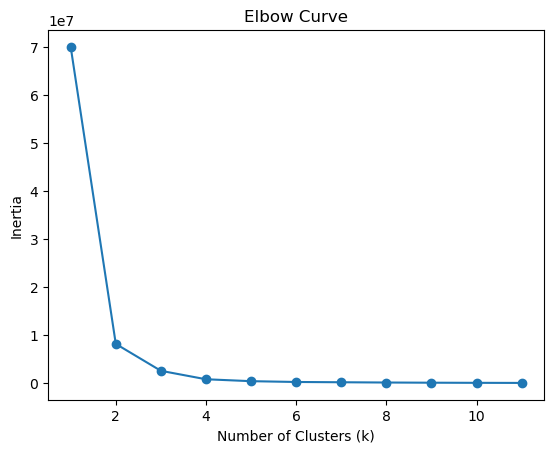

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

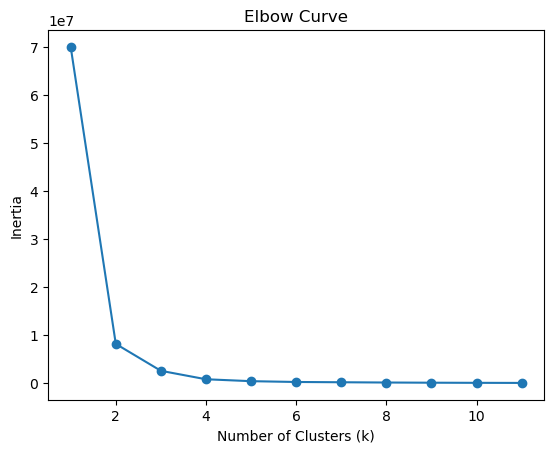

In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
print(elbow_df)
plt.plot(elbow_df['Number of Clusters (k)'], elbow_df['Inertia'], marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show(elbow_df)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** I would say the curve flattens at 5 clusters. This makes sense because bitcoin dominates the market and has the most trades/transactions. This would lead the currency to have a higher volitility going up and down quickly. Meanwhile as other crypto currencies don't see as much volumn of trades. So their value should be less volitile because value is harder to define without more trade information.  

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [10]:
# Initialize the K-Means model using the best value for k
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [11]:
# Fit the K-Means model using the scaled data
kmeans.fit(normal_data)

C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [12]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(normal_data)

# Print the resulting array of cluster values.
print(clusters)

[0 2 0 0 2 2 2 2 0 0 3 0 0 2 0 0 3 0 2 0 3 0 3 0 0 0 0 3 2 3 0 0 1 0 3 3 4
 3 0 0 3]


In [13]:
# Create a copy of the DataFrame
clustered_data = df_market_data.copy()
clustered_data['Cluster'] = clusters

In [25]:
# Add a new column to the DataFrame with the predicted clusters
predicted_clusters = kmeans.predict(normal_data)
df_market_data['Cluster'] = predicted_clusters
# Display sample data
print(df_market_data.head())

        coin_id  price_change_percentage_24h  price_change_percentage_7d  \
0       bitcoin                      1.08388                     7.60278   
1      ethereum                      0.22392                    10.38134   
2        tether                     -0.21173                     0.04935   
3        ripple                     -0.37819                    -0.60926   
4  bitcoin-cash                      2.90585                    17.09717   

   price_change_percentage_14d  price_change_percentage_30d  \
0                      6.57509                      7.67258   
1                      4.80849                      0.13169   
2                      0.00640                     -0.04237   
3                      2.24984                      0.23455   
4                     14.75334                     15.74903   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     -3.25185                      83.51840   
1                    -12.88890      

In [14]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",  # Color the points based on the 'Cluster' column
    cmap='viridis',  # Choose a colormap for coloring
    hover_cols=["coin_id"],  # Add 'coin_id' to identify cryptocurrencies in hover
    title="Crypto Clusters with K-Means",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
    width=800,
    height=600
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Exclude non-numeric columns from the DataFrame
numeric_columns = df_market_data.select_dtypes(include=['number'])

# Create a PCA model instance with n_components=3
pca = PCA(n_components=3)

# Use the PCA model with fit_transform to reduce to three principal components
pca_data = pca.fit_transform(numeric_columns)

# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, index=df_market_data.index, columns=["PC1", "PC2", "PC3"])

# View the first five rows of the DataFrame
print(pca_df.head())



          PC1         PC2        PC3
0 -341.800963  -51.366775  12.525471
1 -249.420466   24.117548 -14.231466
2 -402.614721 -118.710737  24.838397
3 -406.752437  -79.487286   1.566331
4 -382.429948 -103.431959  16.753073


In [16]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance Ratio PC{i + 1}: {ratio:.4f}")


Explained Variance Ratio PC1: 0.9760
Explained Variance Ratio PC2: 0.0230
Explained Variance Ratio PC3: 0.0007


In [17]:
# Calculate the total explained variance for the three principal components
total_explained_variance = explained_variance_ratio.sum()

# Print the total explained variance
print(f"Total Explained Variance of Three Principal Components: {total_explained_variance:.4f}")


Total Explained Variance of Three Principal Components: 0.9998


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .9998

In [18]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, index=df_market_data.index, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
coin_id = df_market_data['coin_id']

# Set the coinid column as index
pca_df.index = coin_id

# Display sample data
print(pca_df.head(5))

                     PC1         PC2        PC3
coin_id                                        
bitcoin      -341.800963  -51.366775  12.525471
ethereum     -249.420466   24.117548 -14.231466
tether       -402.614721 -118.710737  24.838397
ripple       -406.752437  -79.487286   1.566331
bitcoin-cash -382.429948 -103.431959  16.753073


---

### Find the Best Value for k Using the PCA Data

In [26]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1,12))
print(k_values_pca)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [27]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values_pca.append(kmeans.inertia_)

C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters (k)': k_values_pca,
    'Inertia': inertia_values_pca
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

print(elbow_df.head())

   Number of Clusters (k)       Inertia
0                       1  6.997052e+07
1                       2  8.180192e+06
2                       3  2.580721e+06
3                       4  8.237471e+05
4                       5  4.264175e+05


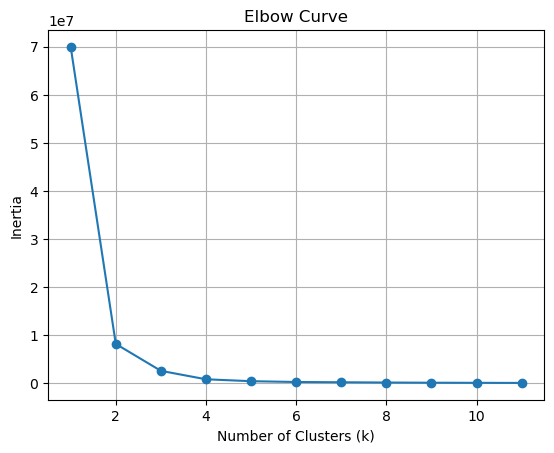

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(k_values_pca, inertia_values_pca, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
5 because the inertia value flattens out after the 5th cluster 

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it is very similiar if not the same as above

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [30]:
# Initialize the K-Means model using the best value for k
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [31]:
# Fit the K-Means model using the PCA data.
kmeans.fit(pca_df)

C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bcroz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pca_df)
# Print the resulting array of cluster values.
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [33]:
# Create a copy of the DataFrame with the PCA data
pca_df_with_clusters = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters['Cluster'] = clusters

# Display sample data
print(pca_df_with_clusters.head())

                     PC1         PC2        PC3  Cluster
coin_id                                                 
bitcoin      -341.800963  -51.366775  12.525471        0
ethereum     -249.420466   24.117548 -14.231466        0
tether       -402.614721 -118.710737  24.838397        0
ripple       -406.752437  -79.487286   1.566331        0
bitcoin-cash -382.429948 -103.431959  16.753073        0


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
scatter_plot = pca_df_with_clusters.hvplot.scatter(x='PC1', y='PC2', by='Cluster', 
                                                   hover_cols=['coin_id'], legend='top_right')

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

ValueError: x and y must have same first dimension, but have shapes (11,) and (22,)

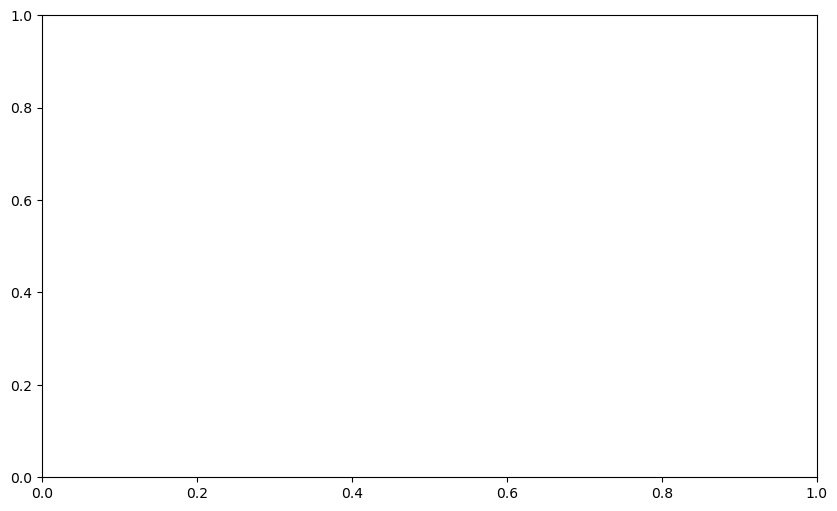

In [36]:
# Composite plot to contrast the Elbow curves

# Plotting the Elbow curves
plt.figure(figsize=(10, 6))

# Plotting the Elbow curve for the original data
plt.plot(k_values, inertia_values, marker='o', label='Original Data')

# Plotting the Elbow curve for the PCA-transformed data
plt.plot(k_values_pca, inertia_values_pca, marker='x', label='PCA Transformed Data')

# Adding labels and title
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Original and PCA Transformed Data')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [48]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

# Plotting the clusters for the original data
scatter_original = df_original.hvplot.scatter(
    x='PC1', y='PC2', by='Cluster', hover_cols=['coin_id'], title='Clusters - Original Data'
)

# Plotting the clusters for the PCA-transformed data
scatter_pca = df_pca.hvplot.scatter(
    x='PC1', y='PC2', by='Cluster', hover_cols=['coin_id'], title='Clusters - PCA Transformed Data'
)

# Composite plot to contrast the clusters
composite_plot = (scatter_original + scatter_pca).cols(1)

# Show the composite plot
composite_plot


NameError: name 'df_original' is not defined

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 